# Basic example with GPN

## Setup

In [1]:
!pip install --quiet git+https://github.com/songlab-cal/gpn.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import gpn.model
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch
from transformers import AutoModel, AutoModelForMaskedLM, AutoTokenizer

In [3]:
model_path = "songlab/gpn-brassicales"

Example region: chr5:3566900-3567600

[UCSC Genome Browser view](https://genome.ucsc.edu/s/gbenegas/gpn%2Darabidopsis%2Dnotebook)

In [4]:
seq = "CGGGTTAAAAATCTAGTTGTTATTATTAAAGGAAATAAAATATCCTCATAAAACAATTTGTTGTAATCTATCTTTGGGCTAATGTTCTTATCCTACAAGACGAACCCTGACCGTATTCGTCGTAGAAAAAAAATTGCTTCGATCCCATCATTGAGTTCAATAATCGGCGCACAAAGGCCGATTCATAAAAACTCTAGGCCCATTAAAGTAAAGCCCATTCTCAACCCTATCCAGTCTCCCTGTATATATATATTTACGACACCAACCCAGCGTTGATATTTAATTTTCTTCAGTCAGAGATTTCGAAACCCTAGTCGATTTCGAGATCCAACTAACTCTGCTCCTTATCTCAGGTAAAATTCTCGCTCGAGAACTCAATTGCTTATCCAAAGTTCCAACTGAAGATGCTTTCCTACTGAATCTTAGGTTAATGTTTTGGATTTGGAATCTTACCCGAAATTTCTCTGCAGCTTGTTGAATTTGCGAAGTATGGGAGACGCTAGAGACAACGAAGCCTACGAGGAGGAGCTCTTGGACTATGAAGAAGAAGACGAGAAGGTCCCAGATTCTGGAAACAAAGTTAACGGCGAAGCTGTGAAAAAGTGAGTTTTATGGTTTCCTCGATATGTTTCATGTATACTACTGTGTGTTTAAATTTGTCGATTCTTAGATTACTACTTGATAACAAGTAGCAGTATGT"
len(seq)

700

## Tokenization

In [5]:
tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.get_vocab()

{'[PAD]': 0, 'a': 3, 'g': 5, 'c': 4, '[MASK]': 1, '[UNK]': 2, 't': 6}

In [6]:
input_ids = tokenizer(seq, return_tensors="pt", return_attention_mask=False, return_token_type_ids=False)["input_ids"]
print(input_ids.shape)
input_ids[0, :10]

torch.Size([1, 700])


tensor([4, 5, 5, 5, 6, 6, 3, 3, 3, 3])

## Embedding

In [7]:
model = AutoModel.from_pretrained(model_path)
model.eval();

In [8]:
with torch.no_grad():
    embedding = model(input_ids=input_ids).last_hidden_state
embedding.shape

torch.Size([1, 700, 512])

In [9]:
# Let's do a quick visualization. We'll standardize the embeddings.

In [10]:
embedding_df = pd.DataFrame(StandardScaler().fit_transform(embedding[0].numpy()))
embedding_df.index.name = "Position"
embedding_df.columns.name = "Embedding dimension"
embedding_df

Embedding dimension,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
Position,,,,,,,,,,,,,,,,,,,,,
0,-0.518086,0.541441,0.131232,1.053510,2.222629,-0.319741,3.644273,1.093818,-1.380534,0.448888,...,-1.018208,-0.878753,-0.646708,-0.062723,-0.801978,-0.035079,2.433414,0.438934,9.229935,-1.419600
1,-0.751135,0.759646,3.220163,-1.068853,2.493010,-0.625320,2.157834,2.325139,-1.241314,-0.314621,...,-0.137703,-2.056975,1.057700,2.712366,-0.671562,-0.513203,0.225547,-0.879120,3.302931,-1.078403
2,-0.710900,-0.167387,-1.117152,-0.147013,0.793041,0.568514,-1.552413,1.677340,-2.283587,-0.763817,...,5.467334,-1.575756,1.160329,-0.117526,-0.490751,0.919966,0.110476,1.463596,1.251710,0.042052
3,-1.011557,0.004416,0.785733,0.880099,-1.314014,0.547281,-0.473240,0.107973,-1.798418,-0.059564,...,1.310843,-2.385744,-0.696324,-0.386536,0.107417,1.299432,0.853751,1.123085,-0.350534,-0.640749
4,-0.082698,-0.310124,-0.716857,3.308861,-1.243263,-1.491933,1.449805,-0.811679,-0.790325,-0.326597,...,-0.745451,-1.395647,-0.916111,-0.836167,0.454243,0.024448,-1.058236,1.308294,3.921494,0.346962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.465113,0.444199,-0.359129,-0.326517,-0.762708,-0.270667,0.442168,0.046693,0.634356,-0.058325,...,0.927364,-0.005681,-0.227225,-0.692033,-0.608916,0.124921,-0.665498,-0.061753,-0.602381,0.614786
696,-0.973834,1.042630,-0.170295,-0.246929,-0.420491,-0.682757,0.149622,0.966532,0.106324,-1.136615,...,-0.626092,-0.790864,-1.010916,3.175091,0.892962,-0.206767,-0.499504,-1.133052,-0.029237,-0.962530
697,-0.493600,0.792000,-0.298589,-0.410181,-1.292572,-0.796225,0.677159,-0.334222,-2.040731,-0.447183,...,-0.239599,0.605497,-0.869040,-0.338021,-0.572182,-0.486568,-0.789857,1.470952,-0.514976,0.262317


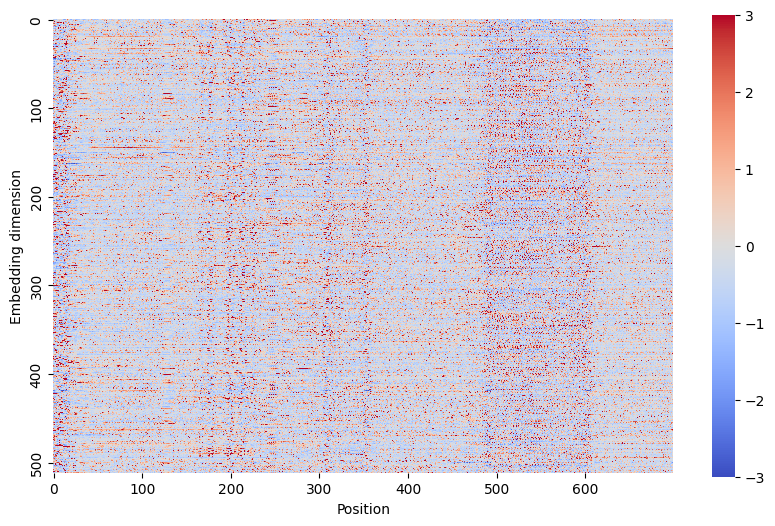

In [11]:
# If you squint you can see the exon locations :)
plt.figure(figsize=(10, 6))
sns.heatmap(embedding_df.T, center=0, vmin=-3, vmax=3, cmap="coolwarm", square=True, xticklabels=100, yticklabels=100);

## Masked language modeling

In [12]:
model_for_mlm = AutoModelForMaskedLM.from_pretrained(model_path)
model_for_mlm.eval();

In [13]:
seq[489:492]  # Start codon

'ATG'

In [14]:
pos = 489  # Let's mask the A and check the model predictions
input_ids[0, pos] = tokenizer.mask_token_id

In [15]:
input_ids
with torch.no_grad():
    all_logits = model_for_mlm(input_ids=input_ids).logits
all_logits.shape

torch.Size([1, 700, 7])

In [16]:
nucleotides = list('acgt')
logits = all_logits[0, pos, [tokenizer.get_vocab()[nc] for nc in nucleotides]]
logits

tensor([ 4.8509, -2.3441, -1.7025, -1.5116])

In [17]:
probs = torch.nn.functional.softmax(logits, dim=0).numpy()
probs

array([9.9611449e-01, 7.4742822e-04, 1.4196944e-03, 1.7183285e-03],
      dtype=float32)

<Axes: xlabel='nucleotide', ylabel='probability'>

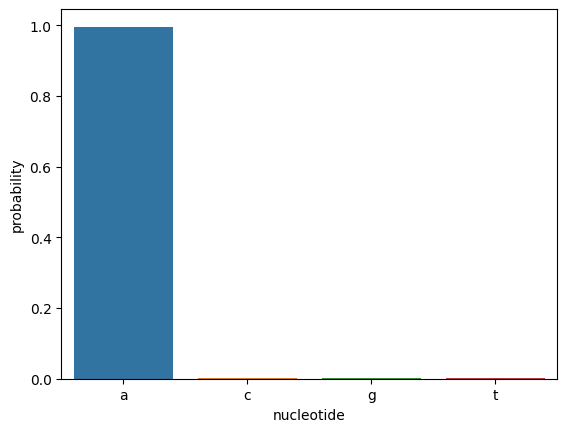

In [18]:
probs_df = pd.DataFrame(dict(nucleotide=nucleotides, probability=probs))
sns.barplot(data=probs_df, x="nucleotide", y="probability")